# 7주차 과제 1번째

#### 통계학과 201618968 김종원

#### 환경 : colab

### import 

In [ ]:
!pip install --upgrade fastai

In [2]:
import torch 
from fastai.vision.all import * 

### data 

`-` download data 

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid')]

`-` list 

In [5]:
threes=(path/'train'/'3').ls()
sevens=(path/'train'/'7').ls()

`-` 여러개의 리스트를 모두 텐서로 바꿔보자. 

In [6]:
seven_tensor = torch.stack([tensor(Image.open(i)) for i in sevens]).float()/255
three_tensor = torch.stack([tensor(Image.open(i)) for i in threes]).float()/255

`-` $X$와 $y$를 만들자. 

In [7]:
y=torch.tensor([0.0]*6265+ [1.0]*6131).reshape(12396,1)

In [8]:
X=torch.vstack([seven_tensor,three_tensor]).reshape(12396,1,28,28)

In [9]:
X.shape, y.shape

(torch.Size([12396, 1, 28, 28]), torch.Size([12396, 1]))

In [10]:
c1=torch.nn.Conv2d(1,16,5) # 입력채널=1 (흑백이므로), 출력채널=16, 윈도우크기5 

In [11]:
c1(X).shape

torch.Size([12396, 16, 24, 24])

In [12]:
m1=torch.nn.MaxPool2d(3)
# 3개의 픽셀을 하나로 압축

In [13]:
m1(c1(X)).shape

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([12396, 16, 8, 8])

In [14]:
a1=torch.nn.ReLU()

In [15]:
a1(m1(c1(X))).shape

torch.Size([12396, 16, 8, 8])

In [16]:
l1=torch.nn.Linear(in_features=1024,out_features=1) 

In [17]:
class Flatten(torch.nn.Module):
    def forward(self,x): 
        return x.reshape(12396,-1)

In [18]:
flatten=Flatten()

In [19]:
flatten(a1(m1(c1(X)))).shape

torch.Size([12396, 1024])

In [20]:
net = nn.Sequential(
    c1, # 컨볼루션(선형)
    m1, # 맥스풀링(비선형) -- 효과? 이미지를 계층적으로 파악할 수 있게함 
    a1, # 렐루(비선형) 
    flatten,#    a1(m1(c1(X))).reshape(12396,-1), ## 이걸 구현해야하는데?? 
    l1) 
## 마지막의 a2는 생략한다. torch.nn..BCEWithLogitsLoss()에 내장되어 있을것이므로 

In [24]:
a2=torch.nn.Sigmoid()

`-` 손실함수와 옵티마이저 정의 

In [21]:
loss_fn=torch.nn.BCEWithLogitsLoss()
optimizer= torch.optim.Adam(net.parameters())

`-` step1~4

In [22]:
for epoc in range(200): 
    ## 1 
    yhat=net(X)
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad()

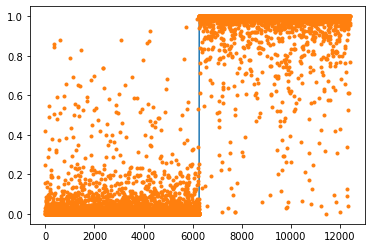

In [25]:
plt.plot(y)
plt.plot(a2(yhat.data),'.')

In [26]:
ypred=a2(yhat.data)>0.5 

In [27]:
sum(ypred==y)/12396

tensor([0.9900])

- 아주 약간 더 안 좋아졌습니다.